ALL IMPORTS

In [37]:
import pandas as pd #for readind and working on the data frame
import numpy as np #for plotting and other mathematical operations
import matplotlib.pyplot as plt 
import seaborn as sns #another plotting tool
import re #conversion of object: Datetime to integer/float
import math #for mathematical operaations
from sklearn.model_selection import train_test_split #for splitting the data set into test and training data
from sklearn import metrics #to check the results and performance of model
from sklearn.ensemble import RandomForestRegressor #inbuilt model 
df=pd.read_csv('Solar_Prediction.csv')

THE DATA FRAME

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32398 entries, 0 to 32397
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              32398 non-null  int64  
 1   UNIXTime                32398 non-null  int64  
 2   Date                    32398 non-null  object 
 3   Time                    32398 non-null  object 
 4   Radiation               32398 non-null  float64
 5   Temperature             32198 non-null  float64
 6   Pressure                32249 non-null  float64
 7   Humidity                32173 non-null  float64
 8   WindDirection(Degrees)  32273 non-null  float64
 9   Speed                   32258 non-null  float64
 10  TimeSunRise             32398 non-null  object 
 11  TimeSunSet              32398 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 3.0+ MB


In [39]:
df.head()

,Unnamed: 0,UNIXTime,Date,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48.0,30.46,59.0,177.39,5.62,06:13:00,18:13:00
1,1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48.0,30.46,58.0,176.78,3.37,06:13:00,18:13:00
2,2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48.0,30.46,57.0,158.75,3.37,06:13:00,18:13:00
3,3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48.0,30.46,60.0,137.71,3.37,06:13:00,18:13:00
4,4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48.0,30.46,62.0,104.95,5.62,06:13:00,18:13:00


CHECKING THE NULL VALUES

In [40]:
df.isnull().sum()

Unnamed: 0                  0
UNIXTime                    0
Date                        0
Time                        0
Radiation                   0
Temperature               200
Pressure                  149
Humidity                  225
WindDirection(Degrees)    125
Speed                     140
TimeSunRise                 0
TimeSunSet                  0
dtype: int64

CONVERT OBJECT TYPE DATA TO NUMERICAL

In [41]:
df['Time_Hour'] = df['Time'].apply(lambda x: re.search(r'^\d+', x).group(0)).astype(int)
df['Time_Minute'] = df['Time'].apply(lambda x: re.search(r'(?<=:)\d+(?=:)', x).group(0)).astype(int)
df['Time_Second'] = df['Time'].apply(lambda x: re.search(r'\d+$', x).group(0)).astype(int)
df['SunriseHour'] = df['TimeSunRise'].apply(lambda x: re.search(r'^\d+', x).group(0)).astype(int)
df['SunriseMinute'] = df['TimeSunRise'].apply(lambda x: re.search(r'(?<=:)\d+(?=:)', x).group(0)).astype(int)
df['SunsetHour'] = df['TimeSunSet'].apply(lambda x: re.search(r'^\d+', x).group(0)).astype(int)
df['SunsetMinute'] = df['TimeSunSet'].apply(lambda x: re.search(r'(?<=:)\d+(?=:)', x).group(0)).astype(int)

df['Temperature^4']=df['Temperature']**4 #feature scaling which helps improve correlation

DROPPING OBJECT TYPE DATA FOR NEXT STEP OF IMPUTATION 

In [42]:
df.drop(columns=['Unnamed: 0','Temperature','Date','Time','UNIXTime','TimeSunRise','TimeSunSet'],inplace=True) #removing the objects which cannot be used for training after extracting its data
df.fillna(df.mean(), inplace=True)
df.head()

,Radiation,Pressure,Humidity,WindDirection(Degrees),Speed,Time_Hour,Time_Minute,Time_Second,SunriseHour,SunriseMinute,SunsetHour,SunsetMinute,Temperature^4
0,1.21,30.46,59.0,177.39,5.62,23,55,26,6,13,18,13,5308416.0
1,1.21,30.46,58.0,176.78,3.37,23,50,23,6,13,18,13,5308416.0
2,1.23,30.46,57.0,158.75,3.37,23,45,26,6,13,18,13,5308416.0
3,1.21,30.46,60.0,137.71,3.37,23,40,21,6,13,18,13,5308416.0
4,1.17,30.46,62.0,104.95,5.62,23,35,24,6,13,18,13,5308416.0


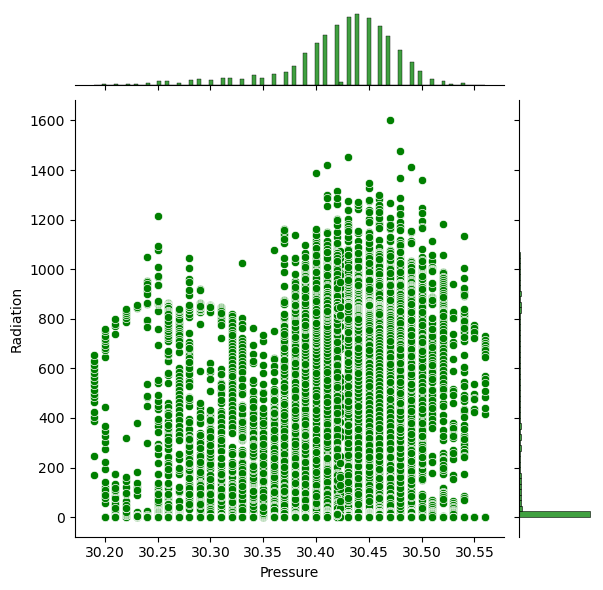

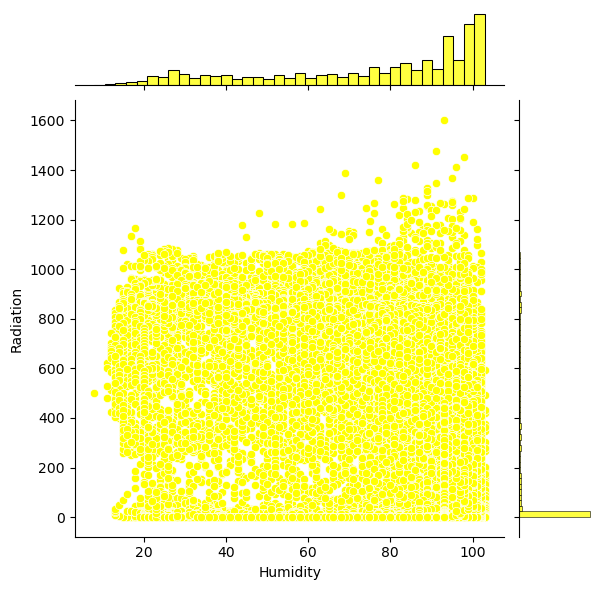

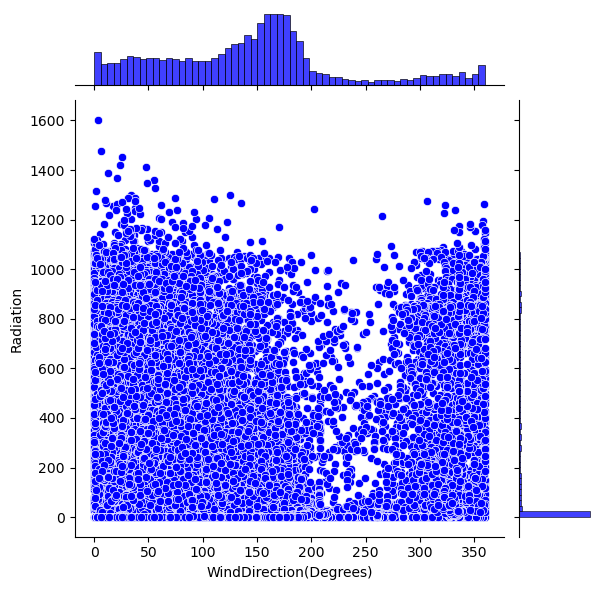

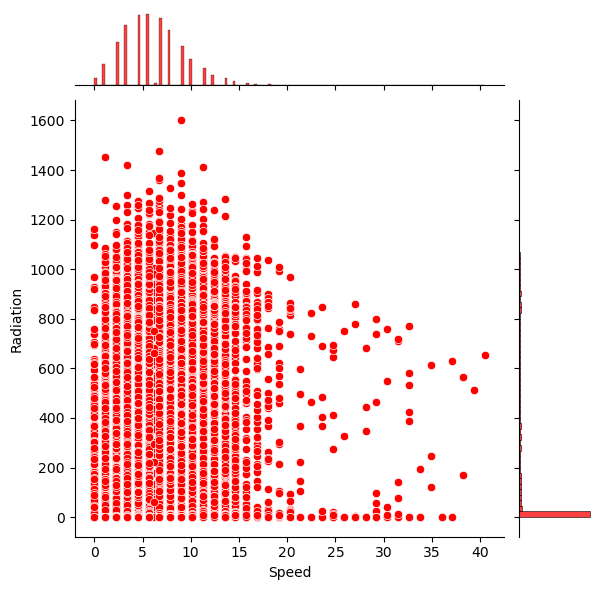

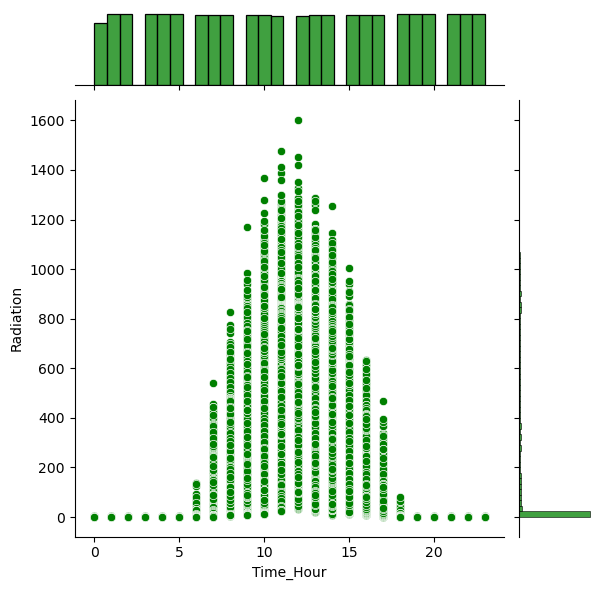

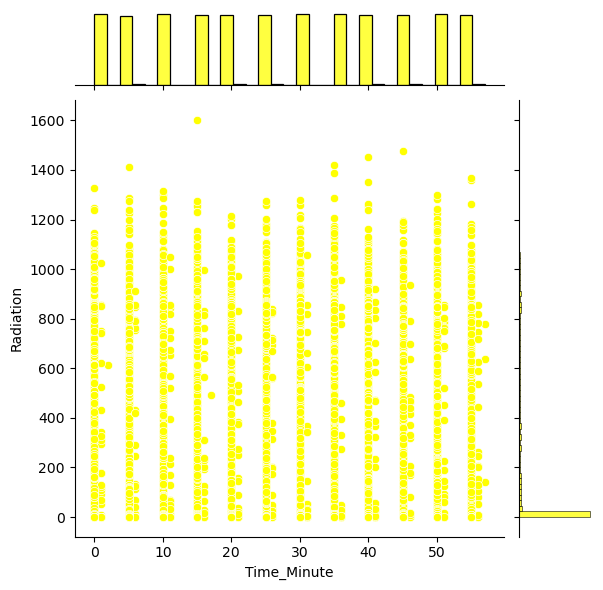

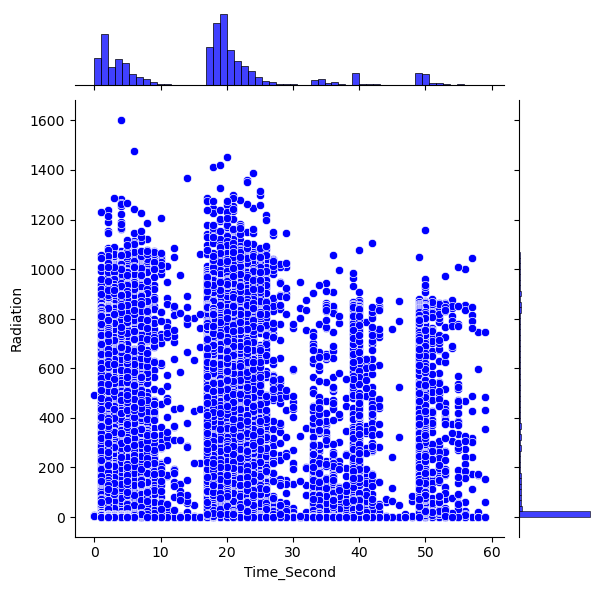

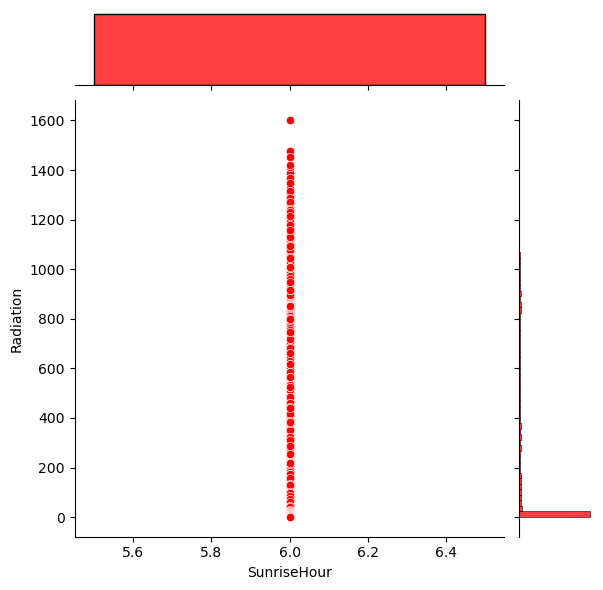

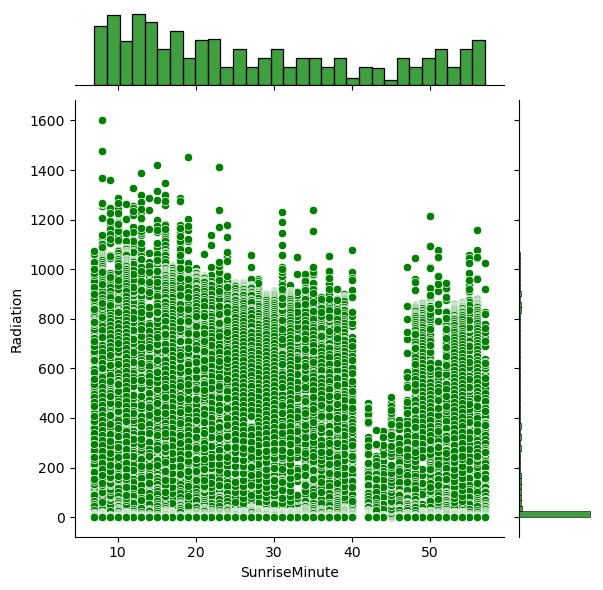

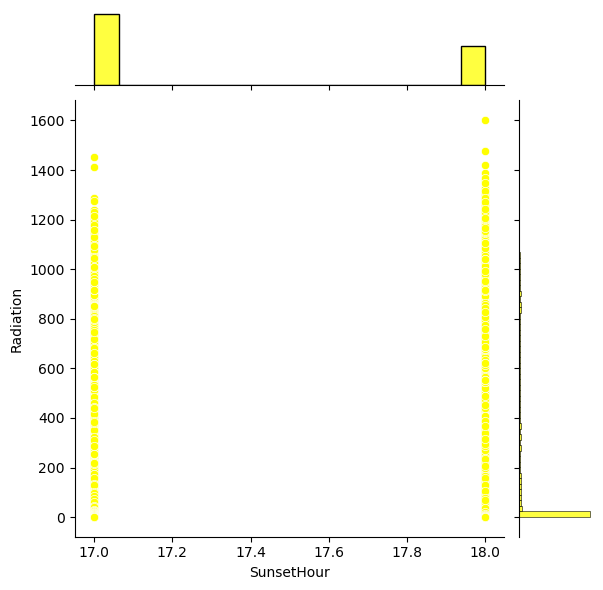

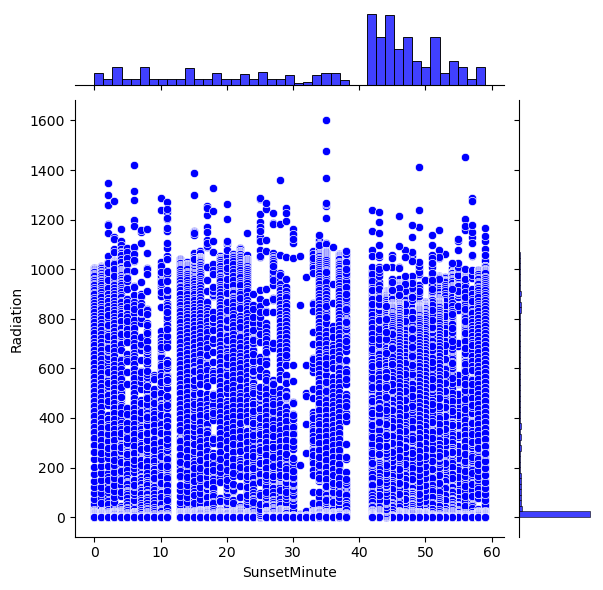

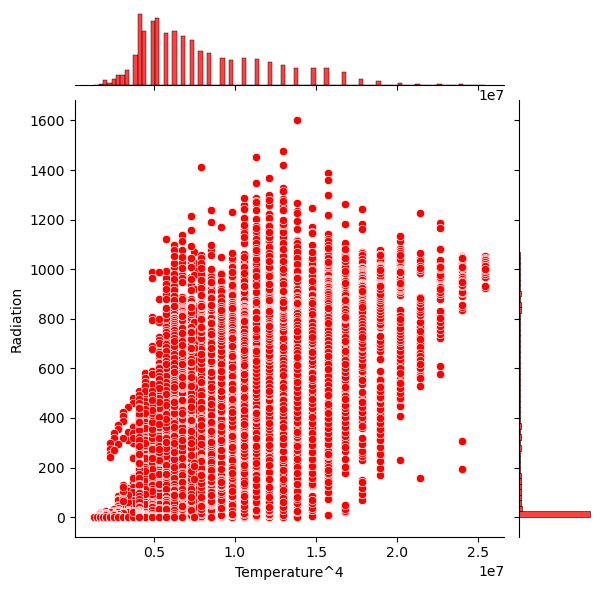

In [43]:
i=0 #plotting with different colors just for fun
for col in df.columns:
    if col!='Radiation':
        i=i+1
        if(i%4==0):
            sns.jointplot(x=col,y='Radiation',data=df,color='red')
        elif(i%4==1):
            sns.jointplot(x=col,y='Radiation',data=df,color='green')
        elif(i%4==2):
            sns.jointplot(x=col,y='Radiation',data=df,color='yellow')
        else:
            sns.jointplot(x=col,y='Radiation',data=df,color='blue')

PLOTTING CORRELATION FOR FINDING BEST FEATURES

<Axes: >

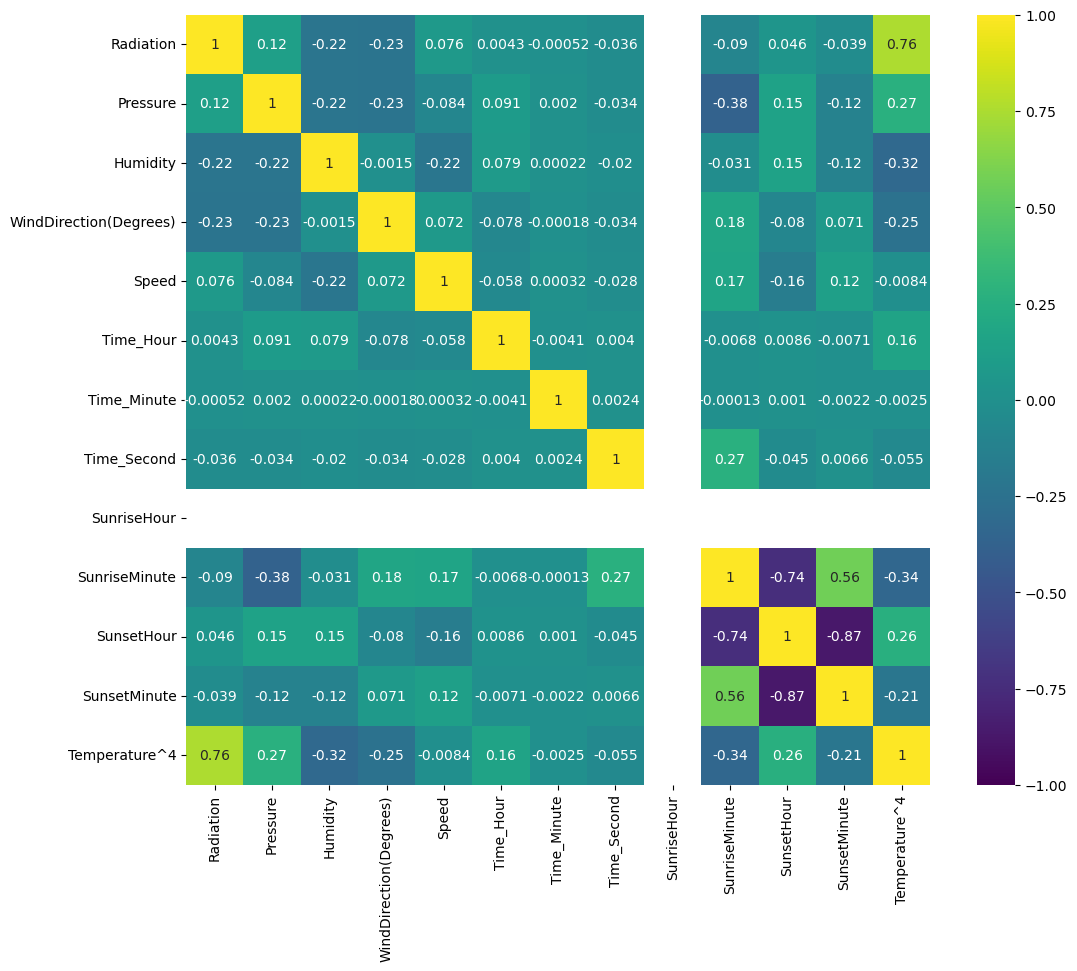

In [44]:
plt.figure(figsize=(12,10))
corr_mat=df.corr(method='pearson',min_periods=1,numeric_only=True)
sns.heatmap(corr_mat,annot=True,vmin=-1,vmax=1,cmap='viridis') #plotting correlation matrix to get better view of features

TRAINING THE MODEL AFTER SELECTING FEATURES

In [45]:
x=df.drop('Radiation',axis=1)
y=df['Radiation']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0) #radom_state=0 for uniform data splitting
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
prediction=rfr.predict(x_test)

PLOTTING TRAINGING AND TEST DATA GRAPHS 

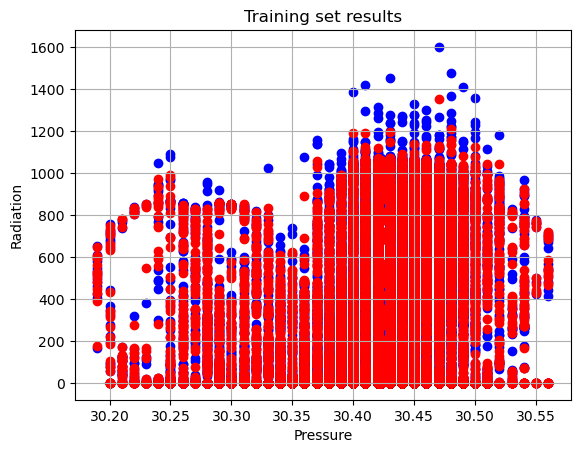

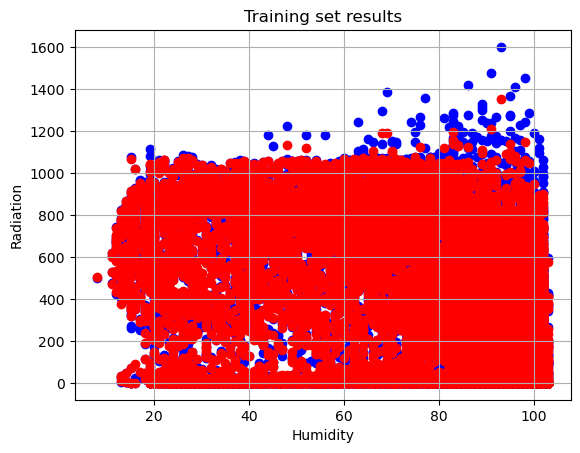

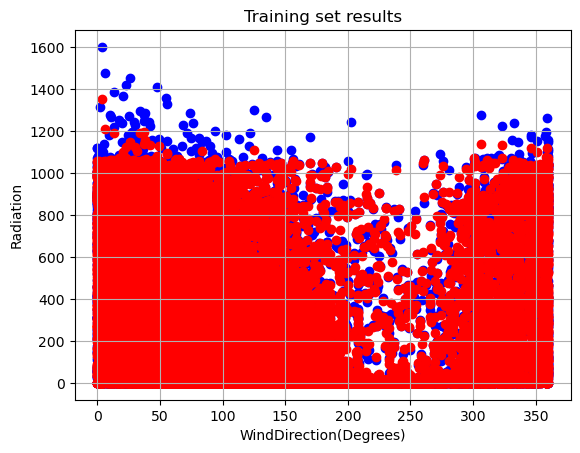

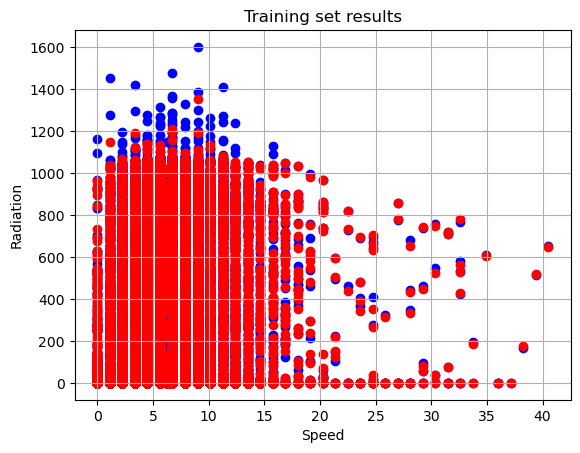

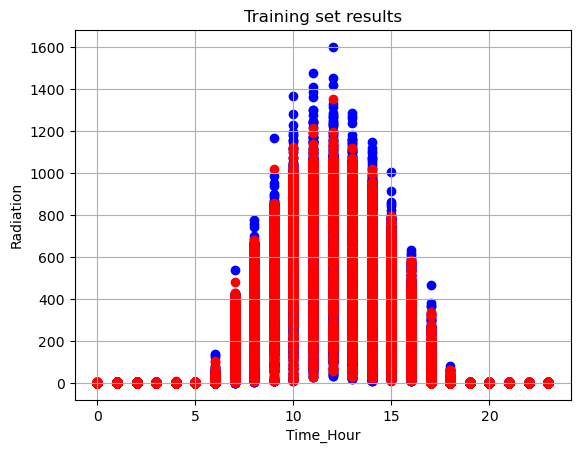

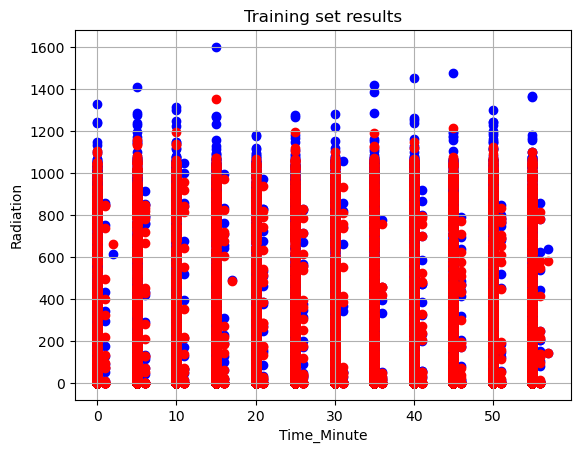

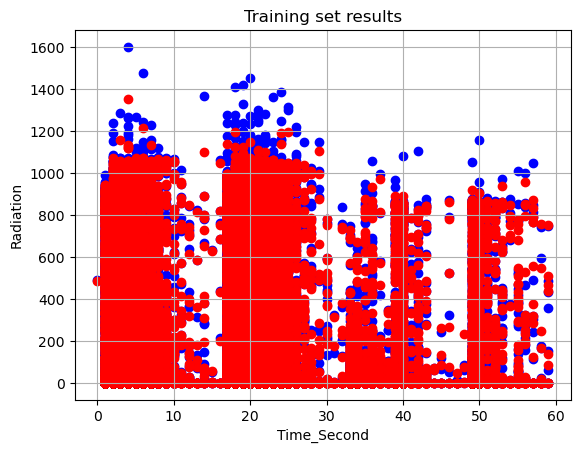

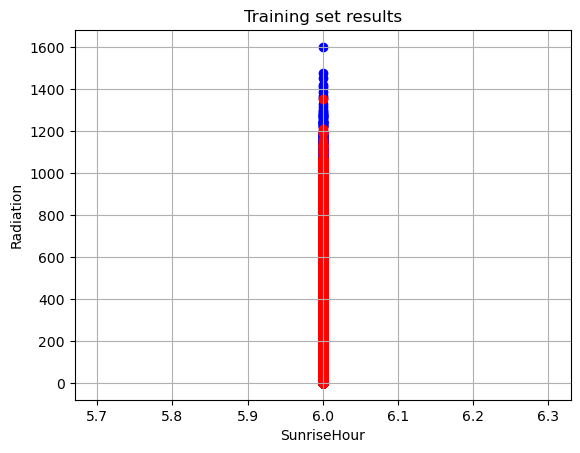

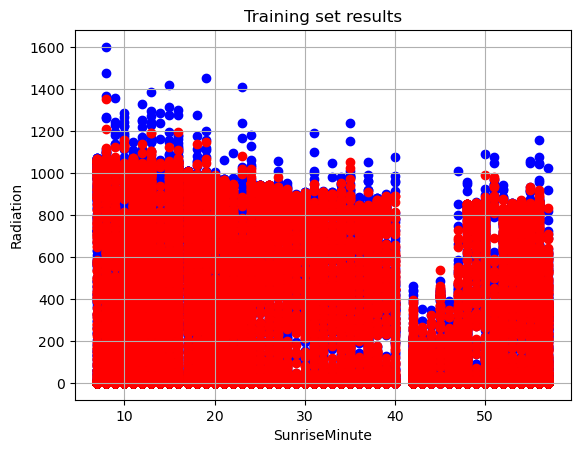

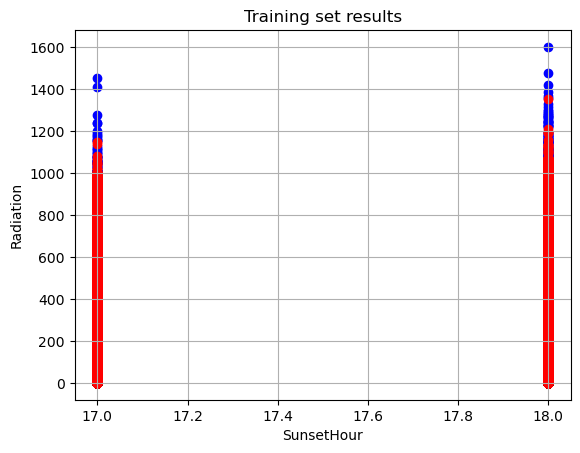

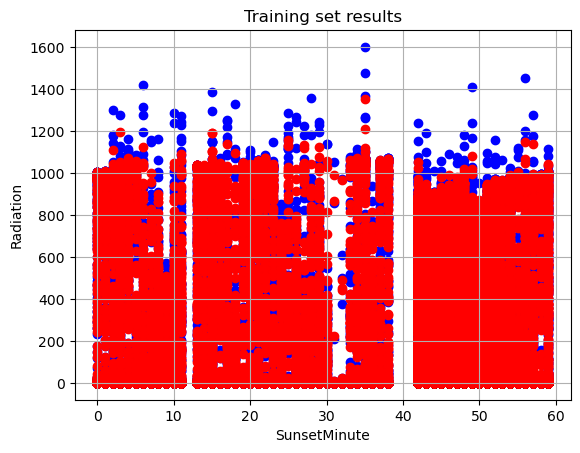

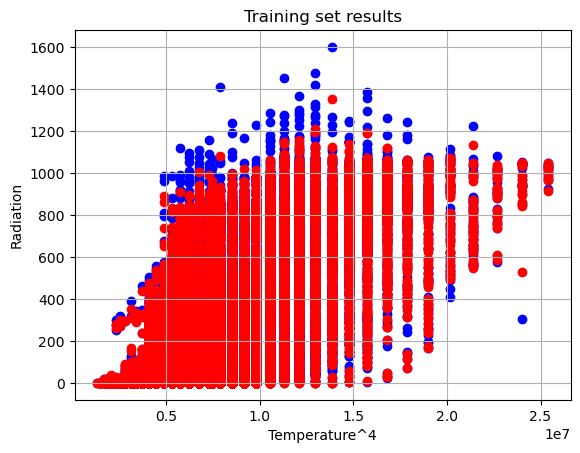

In [46]:
for col in x.columns:
    plt.scatter(x_train[col],y_train,color='blue')
    plt.scatter(x_train[col],rfr.predict(x_train),color='red')
    plt.title('Training set results')
    plt.xlabel(col)
    plt.ylabel('Radiation')
    plt.grid(True)
    plt.show()

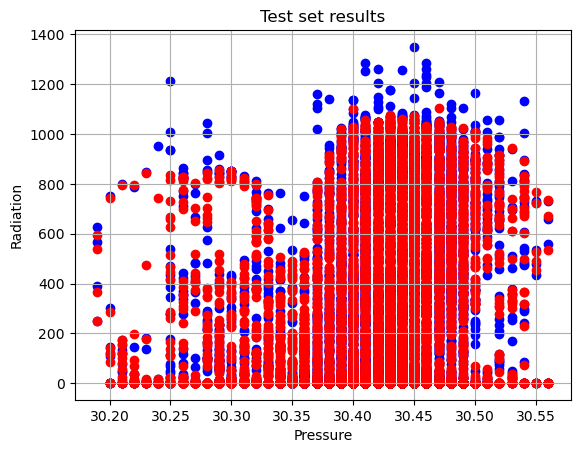

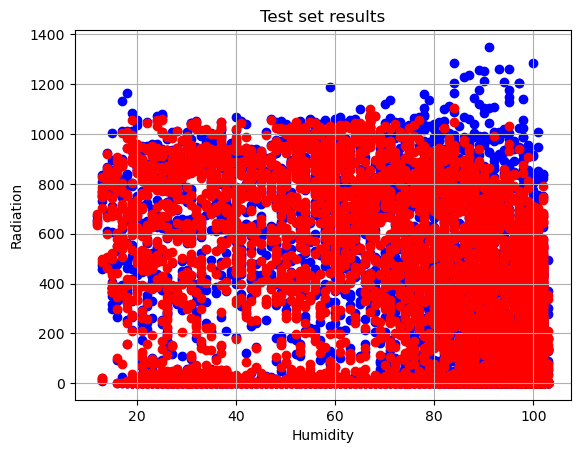

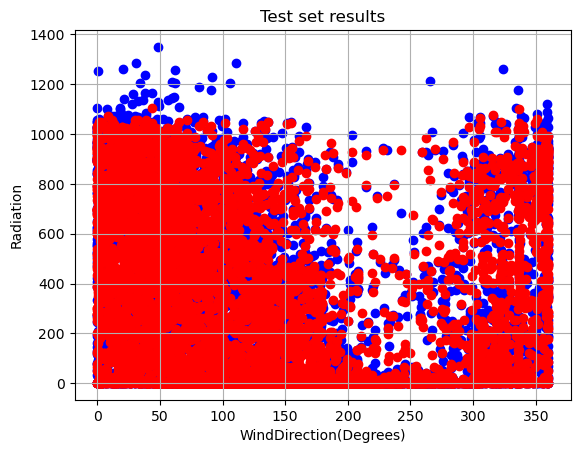

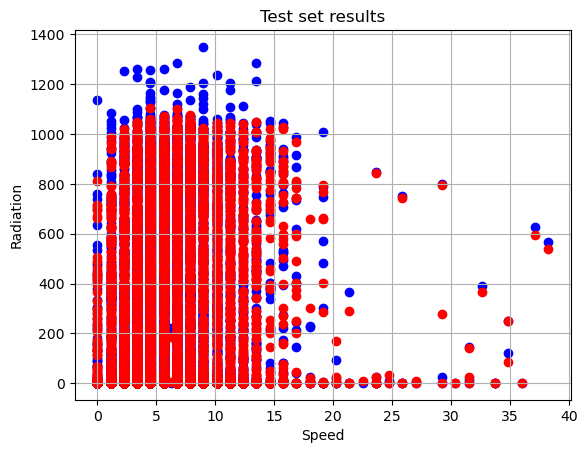

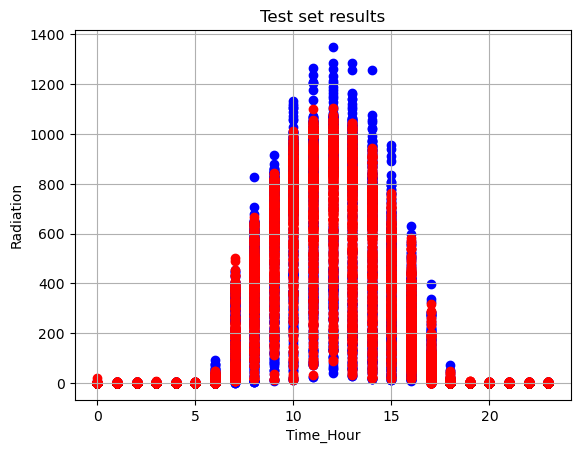

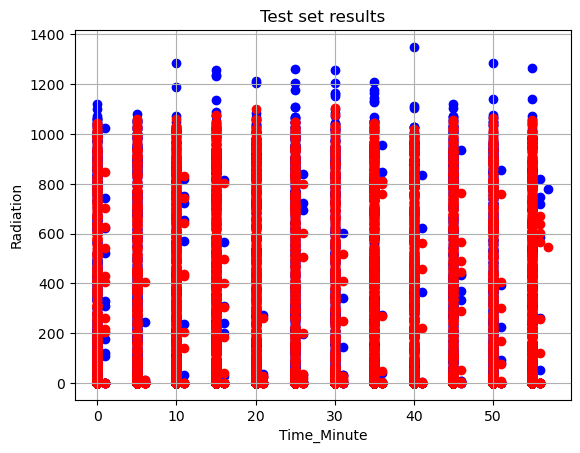

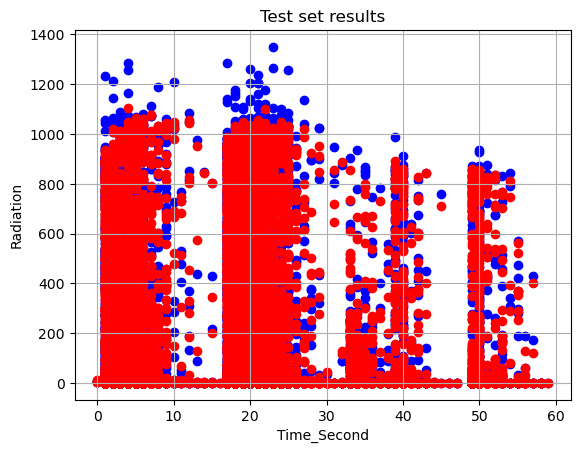

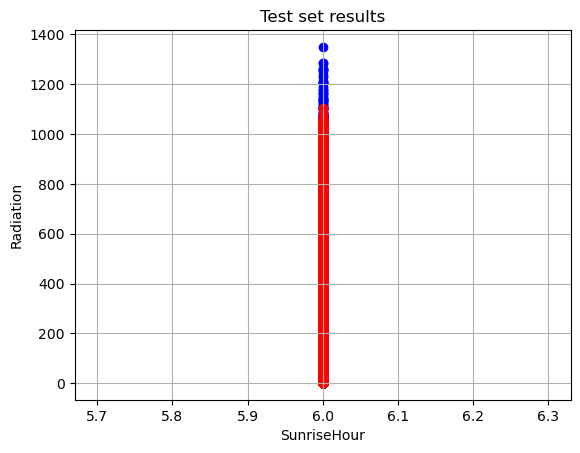

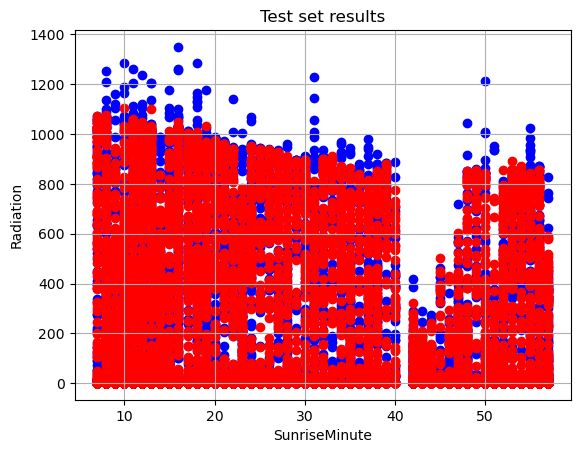

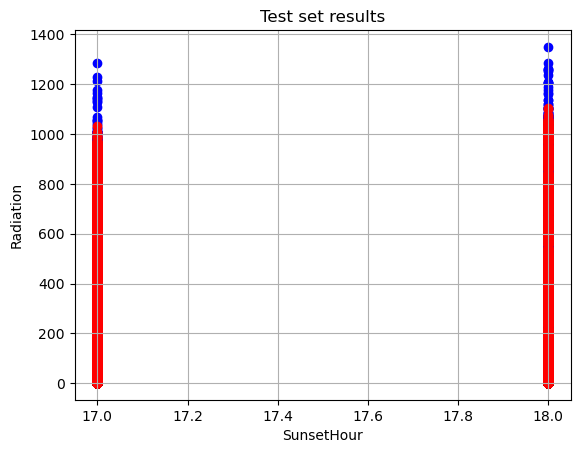

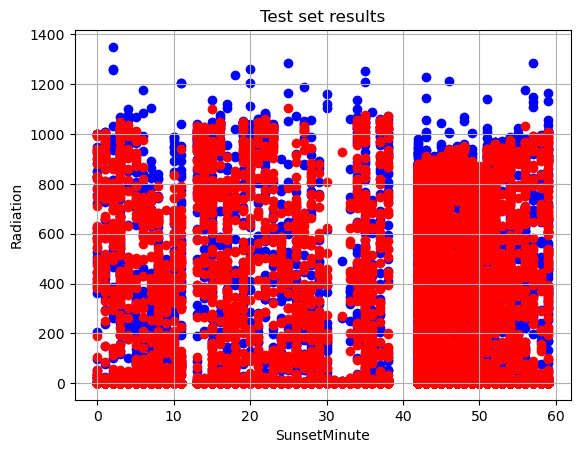

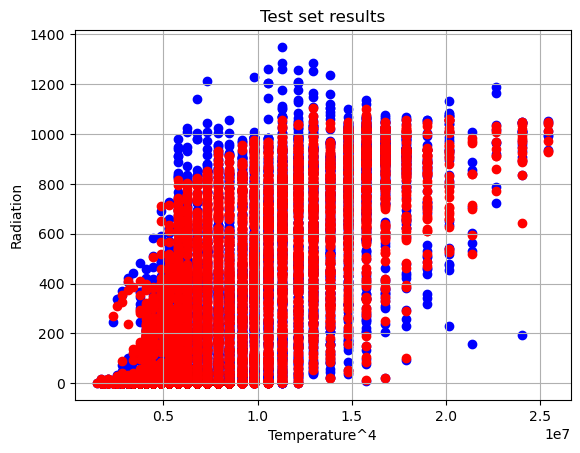

In [47]:
for col in x.columns:
    plt.scatter(x_test[col],y_test,color='blue')
    plt.scatter(x_test[col],rfr.predict(x_test),color='red')
    plt.title('Test set results')
    plt.xlabel(col)
    plt.ylabel('Radiation')
    plt.grid(True)
    plt.show()

RESULTS

In [48]:
mse=metrics.mean_squared_error(y_test,prediction)
r2=metrics.r2_score(y_test,prediction)
mae=metrics.mean_absolute_error(y_test,prediction)
print(f"MSE={mse}")
print(f"R2 Score={r2}")
print(f"MAE={mae}")

MSE=6759.739133035945
R2 Score=0.9331070405289208
MAE=31.882186522633745
